In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/reduced.txt", delimiter=" ").astype(np.float32)
eeg_data.shape

(24, 76800)

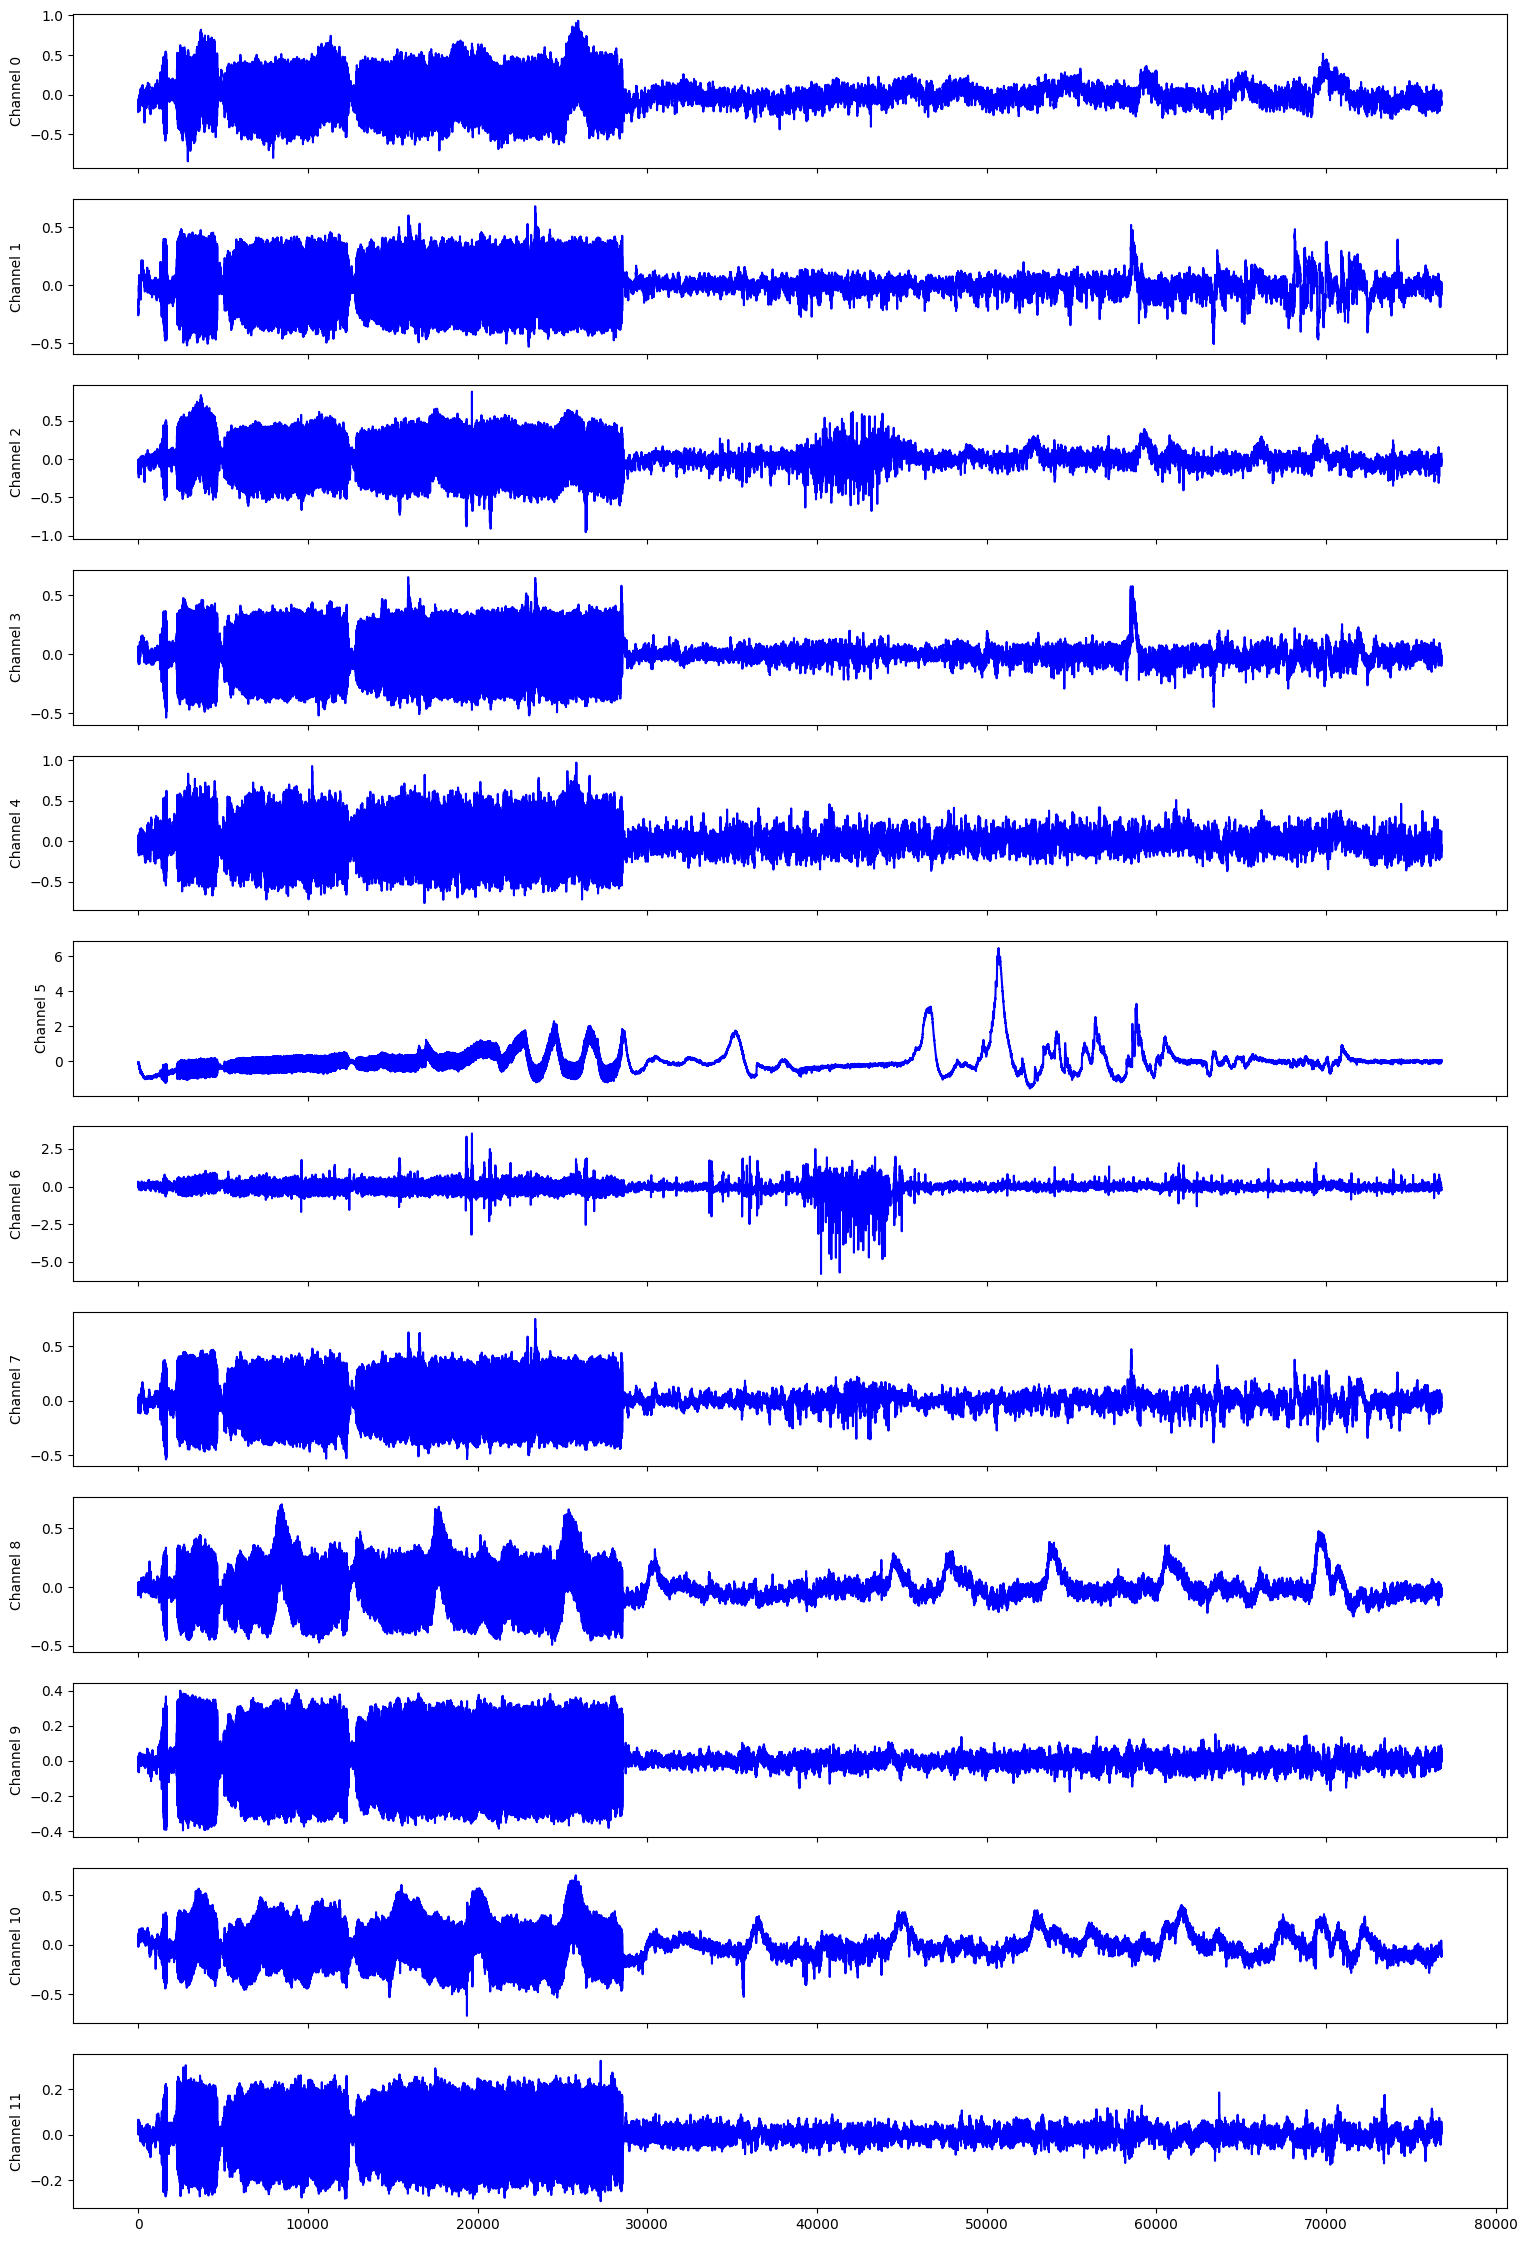

In [29]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(12, 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(12):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

## State 1

Detected at `t=28928`.

In [5]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

<module 'CPD.warm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\warm.py'>

In [30]:
# put arrays in dictionary for labels
channels = {}
for i in range(12):
    channels[f"channel_{i}"] = eeg_data[i]

In [91]:
# warm up for 250 seconds and determine best lags
# (runs in 10 sec)
fftwarm = CPD.warm.FFTWarm(channels, n0=250, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [92]:
import CPD.CPD
reload(CPD.CPD)

<module 'CPD.CPD' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\CPD.py'>

In [109]:
cpd = CPD.CPD.Online(fftwarm, k=6, prob=0.95)

In [110]:
change_point = cpd.run()

cpt = max(change_point.values())

print(f"change point detected at t={cpt}")

STEP 250
channel_3 detected change point! Halting.
channel_4 detected change point! Halting.
channel_2 detected change point! Halting.
channel_9 detected change point! Halting.
channel_0 detected change point! Halting.
channel_7 detected change point! Halting.
6 channels halted. Halting detection.
change point detected at t=32000


In [95]:
change_point

{'channel_3': 32000,
 'channel_1': 32000,
 'channel_4': 32000,
 'channel_2': 32000,
 'channel_5': 32000,
 'channel_9': 32000}

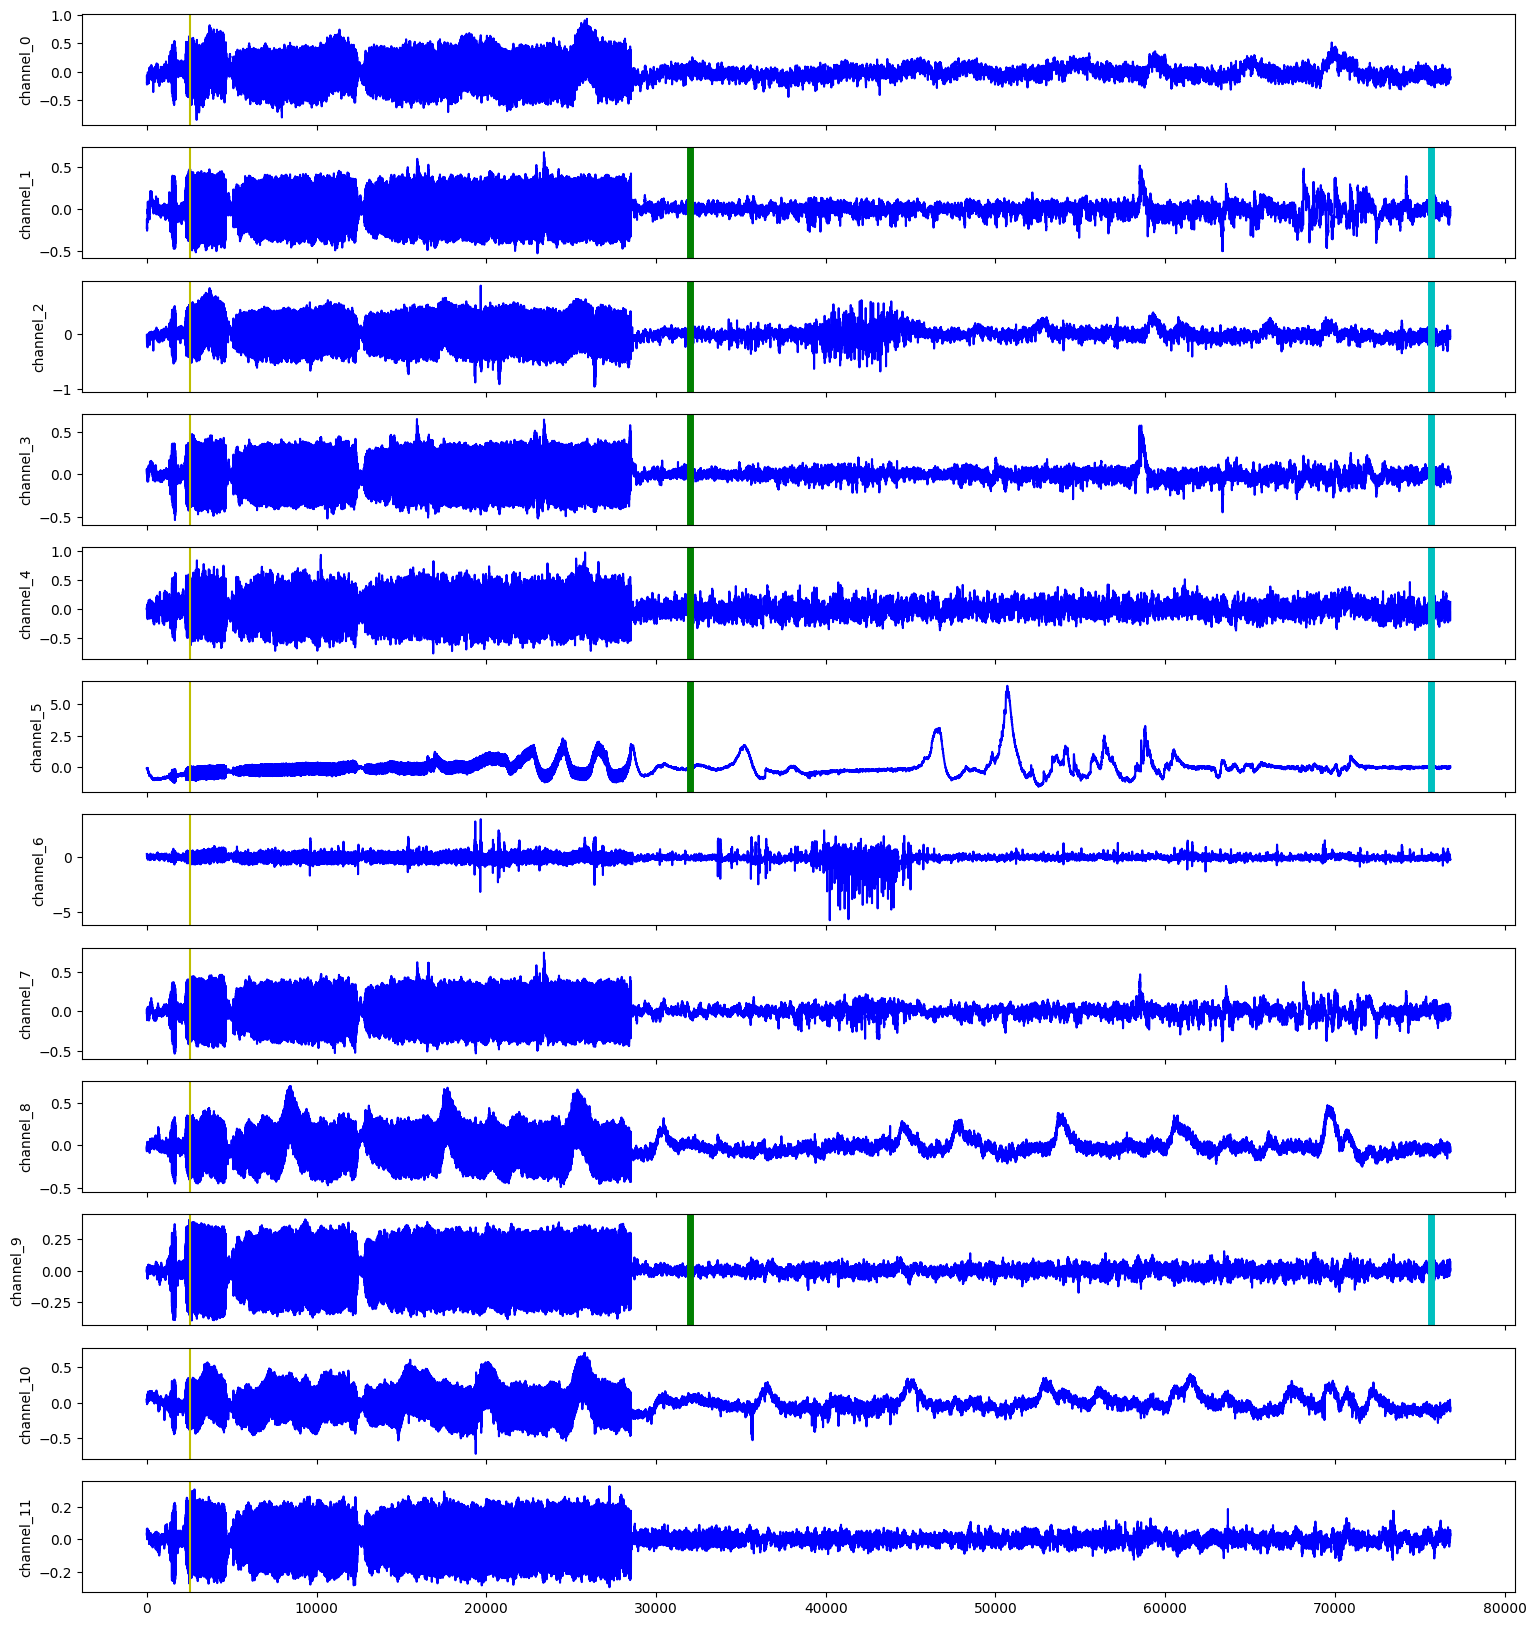

In [96]:
time = [i for i in range(eeg_data.shape[1])]

warmup = 20 * 128
actual_change = 75657

fig, axs = plt.subplots(12, 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(12):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='y')
    if chan in change_point:
        cpt = change_point[chan]
        axs[c].axvline(x=cpt, c='g', linewidth=5)
        axs[c].axvline(x=actual_change, c='c', linewidth=5)
    axs[c].set_ylabel(chan)

## State 2

Detected at `t=33024`

In [14]:
# get data past detected change-point `t=28928`

post_channels = {}
for i in range(len(eeg_data)):
    post_channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [15]:
post_channels["channel_0"].shape

(46848,)

In [18]:
# warm up for 20 seconds and determine best lags
# (warms up in ~7 mins)

fftwarm2 = CPD.warm.FFTWarm(post_channels, n0=200, chunks=6)
fftwarm2.warmup()

['channel_0', 'channel_1', 'channel_2', 'channel_3']
['channel_4', 'channel_5', 'channel_6', 'channel_7']
['channel_8', 'channel_9', 'channel_10', 'channel_11']
['channel_12', 'channel_13', 'channel_14', 'channel_15']
['channel_16', 'channel_17', 'channel_18', 'channel_19']
['channel_20', 'channel_21', 'channel_22', 'channel_23']


In [26]:
cpd2 = CPD.CPD.Online(fftwarm2, k=8, prob=0.8)

In [27]:
change_points2 = cpd2.run()

cpt2 = max(change_points2.values())

print(f"change point detected at t={cpt2}")

STEP 200
channel_1 detected change point! Halting.
channel_6 detected change point! Halting.
channel_5 detected change point! Halting.
channel_13 detected change point! Halting.
channel_18 detected change point! Halting.
channel_15 detected change point! Halting.
channel_9 detected change point! Halting.
channel_19 detected change point! Halting.
8 channels halted. Halting detection.
change point detected at t=25600


75657


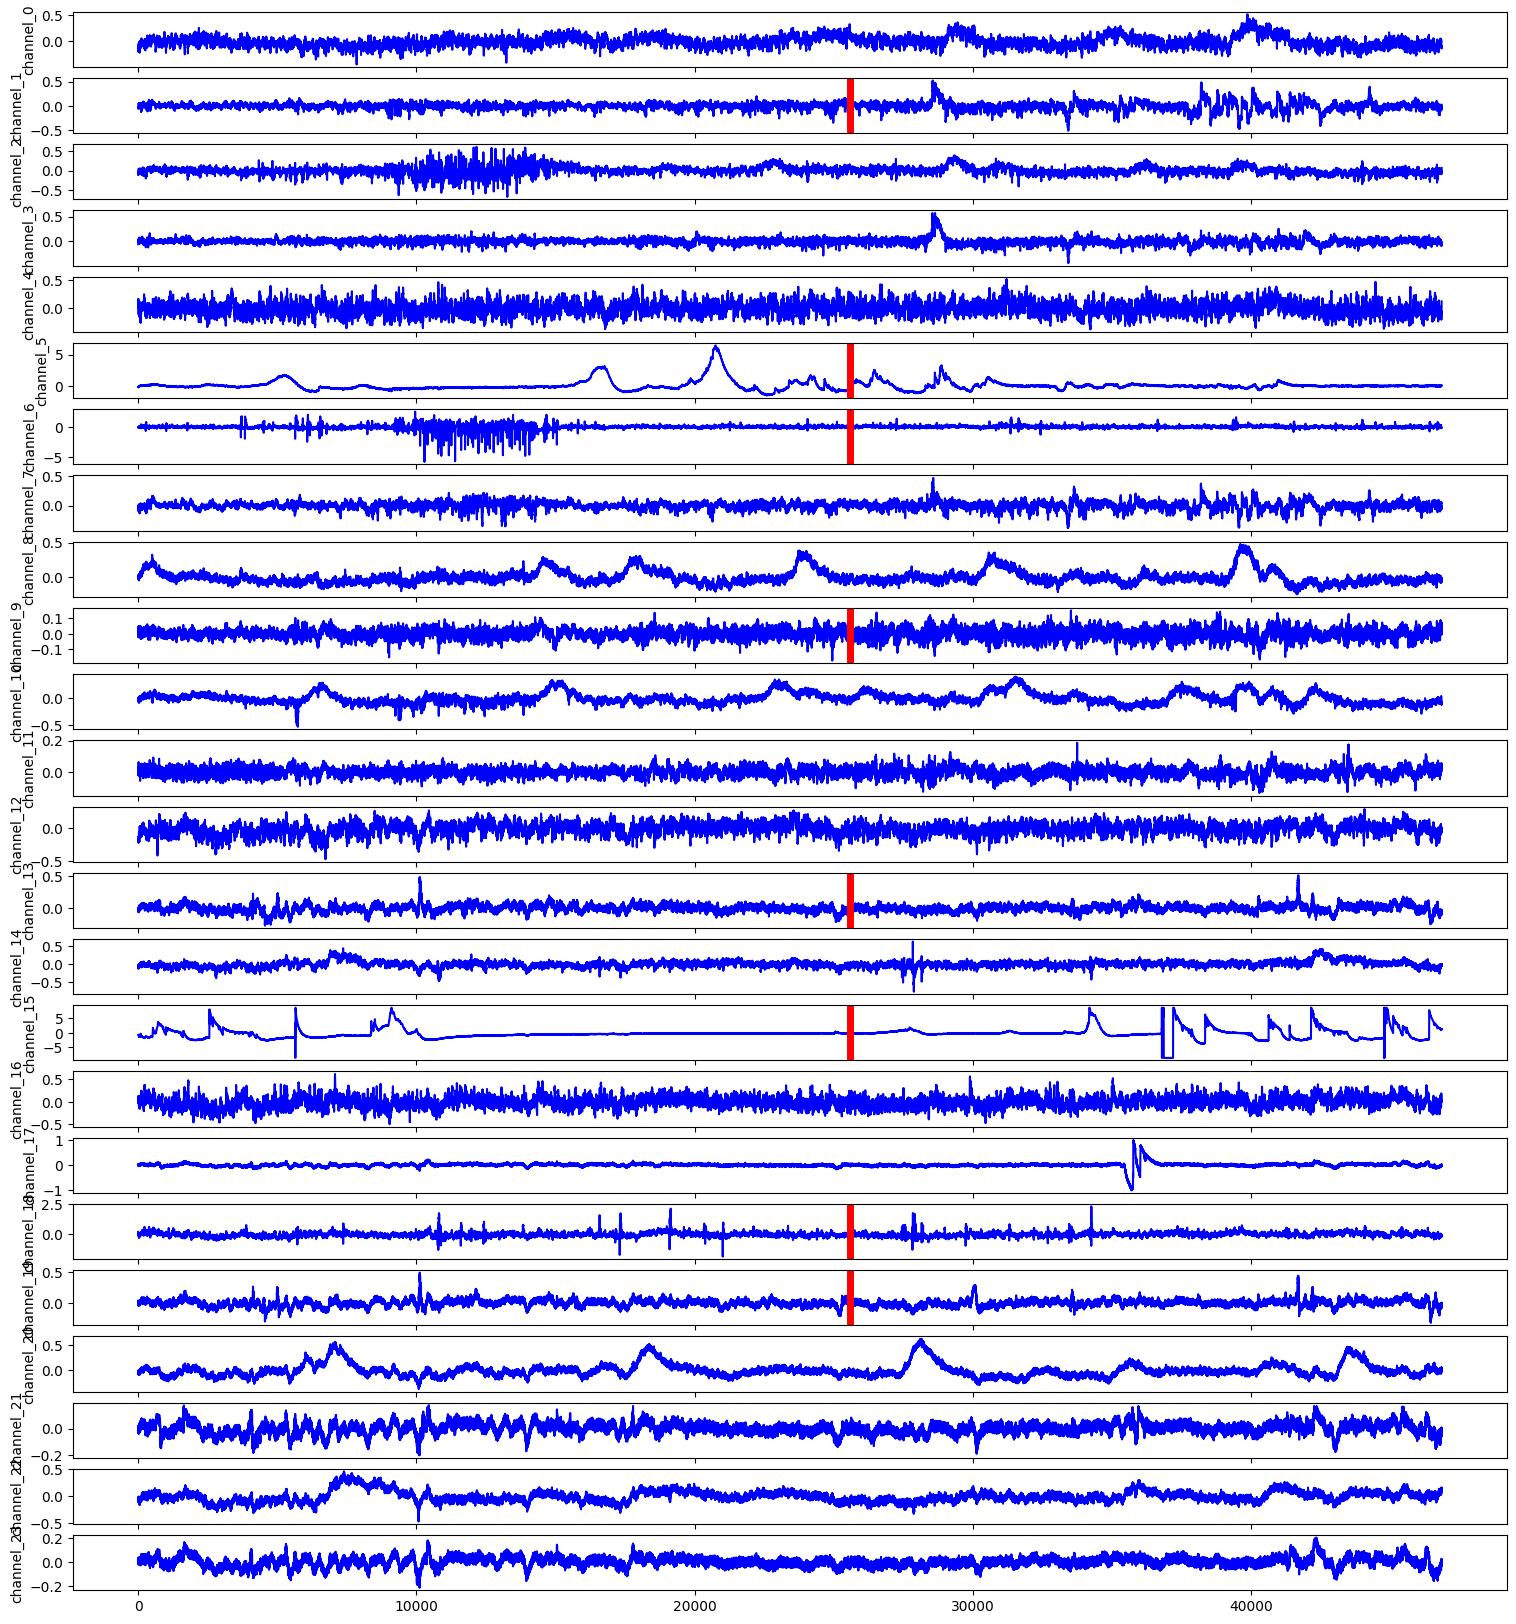

In [28]:
time = [i for i in range(post_channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(post_channels), 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, post_channels[chan], 'b')


    if chan in change_points2:
        next_cpt = change_points2[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)

    axs[c].set_ylabel(chan)

print(actual_change)